<a href="https://colab.research.google.com/github/samara22vazquez/Machine-Learning-Templates/blob/master/Document_Embedding_%2B_similarity_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
from pathlib import Path
from bs4 import BeautifulSoup
from typing import Iterable, List, Set
from nltk import word_tokenize
from nltk.corpus import stopwords 
from nltk import download
from nltk.stem import WordNetLemmatizer
from scipy.stats import entropy
import nltk
try: 
      import emd

except:
  !pip install emd

     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 6.4MB 6.5MB/s 
  Created wheel for numpydoc: filename=numpydoc-0.9.2-cp36-none-any.whl size=31893 sha256=a7106a9c8fd2f1de9c06cdeb9c62c4d4c18eb08ef6bcbd9b03de09bd3a194905
  Stored in directory: /root/.cache/pip/wheels/96/f3/52/25c8e1f40637661d27feebc61dae16b84c7cdd93b8bc3d7486
Successfully built numpydoc


In [ ]:

def preprocess(text):
    """
    Remove Stopwords and punctuation and split into words 

    Args: 
        text: string of text from document 
        
    Returns: 
        processed text 
    """
    nltk.download('stopwords')
    stop_words = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    vocab = []

    for index,document in enumerate(text):
        
        document = document.lower()
        document = word_tokenize(document)  # Split into words.
        document = [w for w in document if not w in stop_words]  # Remove stopwords.
        document = [w for w in document if w.isalpha()] #remove not ASCII characters 
        document = ' '.join(document)
        document = lemmatizer.lemmatize(document) #lemmatize document make all words the inflexsive root
        document_words = document.split()
        vocab.append(document_words)
        text[index] = set(document_words)
    return text,vocab

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/DataMiningCw2/gap-html.zip", 'r')
zip_ref.extractall("/content/")
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = Path('/content/gap-html')
text_files=[]
html_text_data=[]
with os.scandir(path) as entries:
    for entry in entries:
        html_path = Path(path / entry)
        with os.scandir(html_path) as html_entries:
            for html_entry in html_entries: 
                html_file = open(html_entry,'r').read()
                #html_text = html2text.html2text(html)
                html_text = BeautifulSoup(html_file, "html.parser").get_text(" ", strip=True)
                
                html_text_data.append(html_text)
                
            html = ' '.join(html_text_data)
        text_files.append(html)
        html_text_data=[]  


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
documents, corpus = preprocess(text_files)  #preprocess all the text documents 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(corpus,size = 300, workers=3, min_count=1, window = 15)
model.init_sims(replace=True)

In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-04-28 08:27:06--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.142.230
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.142.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.4MB/s    in 1m 52s  

2020-04-28 08:28:59 (14.0 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
from gensim.models.keyedvectors import KeyedVectors
import numpy as np# give a path of model to load function
import gensim.downloader as api


EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz' # from above
word_emb_model = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary = True)
word_emb_model.save('/content/word_emb_model.model')
word_emb_model.init_sims(replace=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
print((model[documents[1]].shape))


(13585, 300)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
from gensim import similarities
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import scipy 

def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    vector_1 = np.mean([model[word] for word in document_a],axis=0)
    vector_2 = np.mean([model[word] for word in document_b],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)

    return (1-cosine)
similarities = []

for document_a in tqdm(documents): 
  document_sim = []
  for document_b in (documents): 
      document_sim.append(cosine_distance_wordembedding_method(document_a,document_b))  
  document_sim_vec = np.asarray(document_sim)
  document_sim_vec = (document_sim_vec - np.min(document_sim_vec))/(np.max(document_sim_vec)-np.min(document_sim_vec))
  similarities.append(document_sim_vec)    

  0%|          | 0/24 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 24/24 [01:56<00:00,  4.86s/it]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


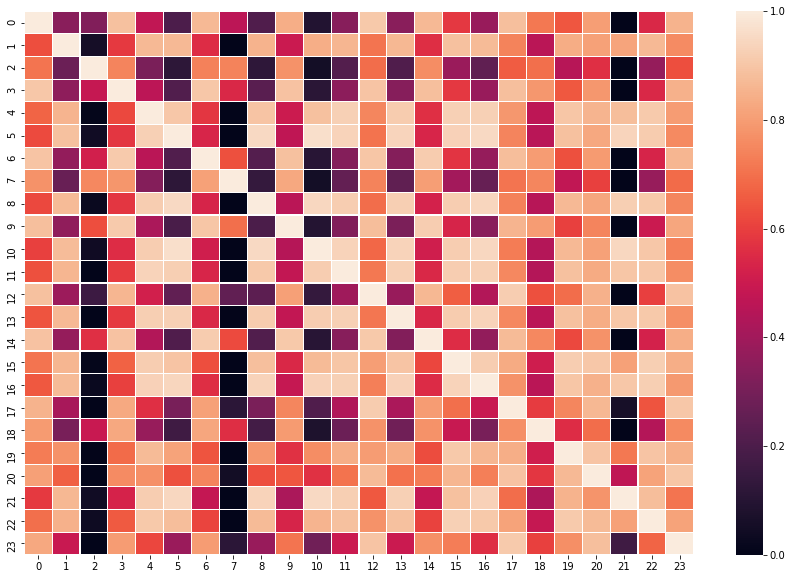

In [ ]:
import seaborn as sns 
plt.figure(figsize=(15,10))
ax = sns.heatmap(similarities, vmin=0, vmax=1, linewidths=.2)
plt.savefig(('Books Similarity'))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
matrix_vectors = []
for document in tqdm(documents):
  matrix_vectors.append(pca.fit_transform(np.asarray(model[document])))



  0%|          | 0/24 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
  4%|▍         | 1/24 [00:00<00:05,  4.40it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
  8%|▊         | 2/24 [00:00<00:04,  4.92it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
 12%|█▎        | 3/24 [00:01<00:10,  1.94it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
 17%|█▋        | 4/24 [00:01<00:08,  2.40it/s]/usr/l

<Figure size 432x288 with 0 Axes>

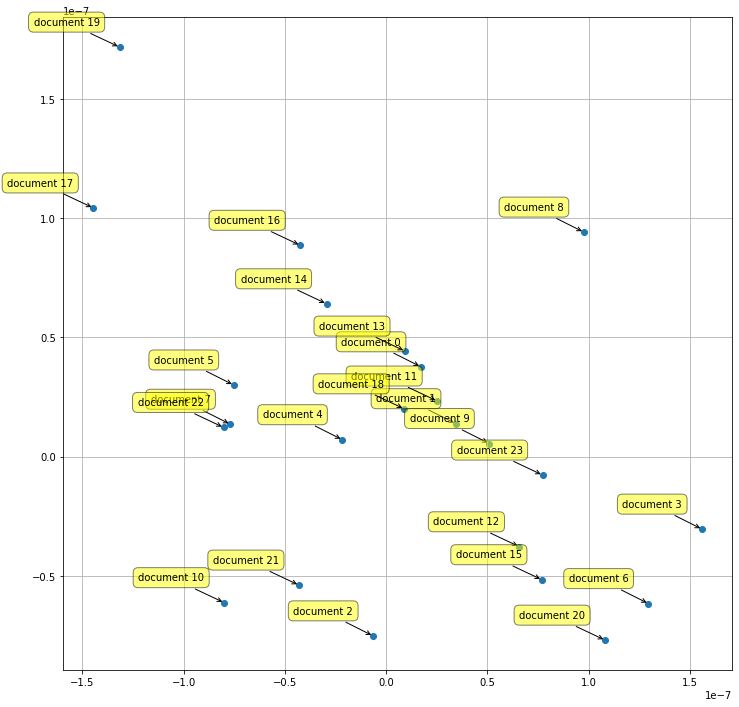

In [ ]:
labels = ['document {0}'.format(i) for i in range(24)]
doc_mean=[]
for data in range(24):
  doc_mean.append(np.mean(matrix_vectors[data],axis=0))
doc_mean=np.asarray(doc_mean)
plt.subplots_adjust(bottom=0.1)
plt.figure(figsize=(12,12))
ax = plt.scatter(
    doc_mean[:, 0], doc_mean[:, 1], marker='o',
    cmap=plt.get_cmap('Spectral'))

for label, x, y in zip(labels, doc_mean[:, 0], doc_mean[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
plt.grid(True)
plt.savefig('Vectors_centroids')

number of estimated clusters : 10


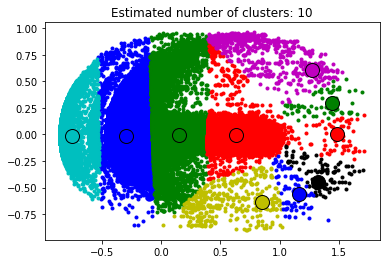

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
matrix_vectors = np.vstack(matrix_vectors)
bandwidth = estimate_bandwidth(matrix_vectors, quantile=0.2, n_samples=15000)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(matrix_vectors)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(matrix_vectors[my_members, 0], matrix_vectors[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
plt.savefig('MeanShiftClustering')

number of estimated clusters : 7


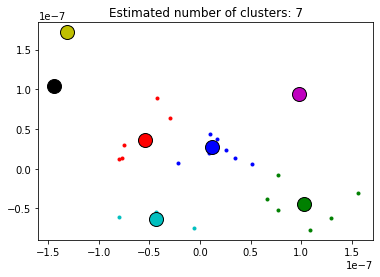

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
matrix_vectors = np.vstack(matrix_vectors)
bandwidth = estimate_bandwidth(doc_mean, quantile=0.2, n_samples=15000)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(doc_mean)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(doc_mean[my_members, 0], doc_mean[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
plt.savefig('MeanShiftClustering')